### The "Why" of Sampling: Population vs. Sample

In data analysis, we are often interested in understanding the characteristics of a large group, known as the **population**. The population is the complete set of all possible observations for a given context. This could be all the people in a country, every coffee bean grown in a year, or all website visits for a specific product.

Collecting data for an entire population, a process known as a **census**, is often prohibitively expensive, time-consuming, or simply impossible. **Sampling** provides a practical solution by allowing us to work with a **sample**, which is a manageable subset of the population. We can then use statistics to draw conclusions about the entire population based on what we observe in the sample.

#### Population Parameters vs. Point Estimates

The goal of sampling is typically to estimate a numerical summary of the population. The terminology to distinguish between a calculation on a population and on a sample is crucial:

  * **Population Parameter**: A numerical value calculated on the **entire population**. This is the true, but often unknown, value we want to find (e.g., the true average rating of all coffees).
  * **Point Estimate** (or **Sample Statistic**): The corresponding numerical value calculated on a **sample**. We use this point estimate as our best guess for the unknown population parameter (e.g., the average rating of 50 sampled coffees).


```python
import pandas as pd
import numpy as np

# Create a generic "population" DataFrame
population = pd.DataFrame({'value': np.random.normal(loc=100, scale=10, size=1000)})

# Take a random sample of 50 observations
sample = population.sample(n=50, random_state=42)

# 1. Calculate the population parameter (we can do this because we created the data)
population_mean = population['value'].mean()
print(f"Population Mean (Parameter): {population_mean:.4f}")

# 2. Calculate the point estimate from the sample
sample_mean = sample['value'].mean()
print(f"Sample Mean (Point Estimate): {sample_mean:.4f}")
```
### The Peril of Bad Sampling: Bias

For a point estimate to be a reliable guess of the population parameter, the sample must be **representative** of the population. If the sample is skewed in some way, it is considered **biased**, and the resulting point estimates will be inaccurate.

A common cause of this is **convenience sampling**, where data is collected using the easiest method available rather than a random one. The infamous 1936 *Literary Digest* poll is a classic example. Their sample was biased towards wealthier individuals, causing them to incorrectly predict the outcome of the presidential election. Similarly, taking the first 10 rows of a sorted dataset (`df.head(10)`) is a convenience sample and will likely produce a biased result.

### The Solution: Random Sampling and Reproducibility

#### Simple Random Sampling

To avoid bias, we use **random sampling**, where each member of the population has an equal chance of being selected. In pandas, this is easily achieved with the `.sample()` method. A random sample is much more likely to have a distribution that reflects the overall population.

#### Pseudo-Random Numbers and Reproducibility

Computers do not generate truly random numbers from physical processes. Instead, they use algorithms to generate **pseudo-random numbers**. These algorithms start with an initial value called a **seed** and then calculate the next "random" number based on the previous one.

The most important property of this process is that the **same seed value will always produce the exact same sequence of random numbers**. This is not a flaw; it is a critical feature that ensures **reproducibility**. By setting a seed before you sample, you guarantee that you (or a colleague) can re-run your code and get the exact same sample, making your analysis verifiable and reproducible. In `numpy` and `pandas`, the seed is set using `np.random.seed()` or the `random_state` parameter.

```python
# Set a seed and draw a sample
np.random.seed(42)
sample1 = population['value'].sample(n=5)
print(f"Sample 1 (seed=42):\n{sample1}\n")

# Draw another sample without resetting the seed - it will be different
sample2 = population['value'].sample(n=5)
print(f"Sample 2 (no seed reset):\n{sample2}\n")

# RESET the seed to the same value and draw a third sample
np.random.seed(42)
sample3 = population['value'].sample(n=5)
print(f"Sample 3 (seed reset to 42):\n{sample3}\n")
```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
spotify_url = "https://assets.datacamp.com/production/repositories/5975/datasets/18d07c39535b900b64dc145985d9e8dfbf2ca498/spotify_2000_2020.feather"
spotify_population = pd.read_feather(spotify_url)
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [ ]:
# Sample 1000 rows from spotify_population, assigning to spotify_sample.
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
display(spotify_sample)

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20169,0.113000,['Elevation Worship'],0.436,351054.0,5.850900,0.636,0.0,1pyv4TvmufPTYOFQFWMXOF,0.000000,2.0,0.6470,-7.339,1.0,Jesus I Come,49.0,2014-11-25,0.0409,140.140,0.140,2014.0
30459,0.613000,['Troye Sivan'],0.481,187195.0,3.119917,0.179,0.0,6LteLVcW0oWLjuW6nePyWb,0.000028,3.0,0.1450,-21.424,1.0,The Fault in Our Stars,66.0,2013-05-05,0.1090,74.850,0.405,2013.0
1003,0.080900,['TobyMac'],0.507,266547.0,4.442450,0.770,0.0,5QZunYrvUrJs3Mzrjl7fKV,0.000000,0.0,0.2140,-5.018,1.0,City On Our Knees,48.0,2010-02-05,0.0424,155.945,0.482,2010.0
39213,0.009800,"['Macklemore', 'Lil Yachty']",0.922,261615.0,4.360250,0.583,1.0,7bsnTsbiwOymZWjPF9v6Di,0.000000,5.0,0.0962,-4.982,1.0,Marmalade (feat. Lil Yachty),66.0,2017-09-22,0.0753,136.043,0.494,2017.0
37302,0.026800,['Ariana Grande'],0.847,267107.0,4.451783,0.579,0.0,5Il6Oe7lr5XM7A0cWbVQtr,0.054500,1.0,0.1020,-5.314,1.0,bad idea,71.0,2019-02-08,0.0719,137.998,0.569,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040,0.065800,['Reik'],0.646,235079.0,3.917983,0.690,0.0,7cmb3HGilknStaiZNoJiqk,0.000000,2.0,0.1140,-6.059,1.0,Levemente,40.0,2005-05-24,0.0243,96.010,0.467,2005.0
13203,0.000408,['Hatebreed'],0.560,169547.0,2.825783,0.985,0.0,3y2p2XXpgw5QHxKmokQEHQ,0.015000,8.0,0.1100,-3.711,1.0,To the Threshold,45.0,2006-07-27,0.1090,144.968,0.419,2006.0
26191,0.309000,['Christina Perri'],0.421,285120.0,4.752000,0.407,0.0,1QUpqu8865jfasDr8M3IKN,0.000961,10.0,0.1100,-7.445,1.0,A Thousand Years,57.0,2011-11-04,0.0267,139.028,0.161,2011.0
6805,0.013800,['Coheed and Cambria'],0.572,206880.0,3.448000,0.932,0.0,65j0cTjkRePBhUbEjrk5Xm,0.000000,1.0,0.5050,-5.130,1.0,Crossing The Frame,43.0,2005-01-15,0.1130,161.973,0.741,2005.0


In [ ]:
# Calculate the mean duration_minutes and from spotify_population using pandas.
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration_minutes and from spotify_sample using pandas.
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.807825916666667


### Simple sampling and calculating with NumPy
You can also use `numpy` to calculate parameters or statistics from a list or `pandas` Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

In [ ]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population["loudness"]

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.64649


## What is Convenience Sampling?

Convenience sampling is the practice of collecting data using the easiest method available. This might involve surveying people in a specific location (like a shopping mall), using the first `n` rows of a dataset, or polling individuals who are easily reachable. While this method is straightforward, it carries a significant risk: the individuals or data points that are "convenient" to access are often systematically different from the population as a whole. This discrepancy leads to sample bias.

### Historical Failures: The Dangers of Sample Bias

History is filled with examples where convenience sampling led to dramatically incorrect conclusions.

#### The 1936 Literary Digest Poll

One of the most famous examples is the 1936 *Literary Digest* presidential poll. The magazine surveyed millions of people and confidently predicted that Alf Landon would defeat Franklin D. Roosevelt, winning 57% of the vote. However, the actual result was a landslide victory for Roosevelt, who won 62% of the vote. The poll's failure was due to **sample bias**. Their sample was drawn from sources like telephone directories and club membership lists, which in 1936, over-represented wealthier Americans who were more likely to vote for Landon. The sample was not representative of the general electorate, and the poll's prediction was consequently worthless.

### The Disneyland Paris Analogy

A more modern example illustrates the same principle. If you were to estimate the average age of all people in France, you could conduct a survey at Disneyland Paris. You might find a mean age of 24.6 years in your sample. However, this would be a **poor estimate** of the true average age in France (which was 41.2 in 2015), because visitors to a theme park are not representative of the country's entire population.

### Convenience Sampling in Code

In data analysis, taking the first `n` rows of a DataFrame with `.head(n)` is a form of convenience sampling. If the data is sorted in any way, this sample will be biased.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a generic "population" DataFrame, sorted by value.
# This mimics a dataset like coffee ratings where the best are listed first.
population = pd.DataFrame({
    'rating': np.sort(np.random.normal(loc=82, scale=3, size=1000))[::-1]
})

# Population Parameter 
population_mean = population['rating'].mean()
print(f"True Population Mean Rating: {population_mean:.2f}")

# Convenience Sample 
convenience_sample = population.head(10)
convenience_mean = convenience_sample['rating'].mean()
print(f"Convenience Sample Mean (first 10 rows): {convenience_mean:.2f}")
```

As shown, the mean of the convenience sample is a significant overestimate of the true population mean because the sample only includes the highest-rated items.

### Visualizing the Bias

A histogram clearly shows how unrepresentative a convenience sample can be.

```python
import seaborn as sns

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Population distribution
sns.histplot(data=population, x='rating', bins=np.arange(70, 95, 1), ax=axes[0])
axes[0].set_title("Population Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# Convenience sample distribution
sns.histplot(data=convenience_sample, x='rating', bins=np.arange(70, 95, 1), ax=axes[1])
axes[1].set_title("Convenience Sample Distribution")
axes[1].set_xlabel("Rating")

plt.tight_layout()
plt.show()
```

The convenience sample's distribution is a skewed, narrow slice of the population's distribution and does not reflect its true shape or center.

### The Alternative: Simple Random Sampling

To avoid sample bias, **simple random sampling** is used. This method ensures that every member of the population has an equal chance of being selected. A random sample is far more likely to be representative.

```python
# Random Sample 
np.random.seed(42) # for reproducibility
random_sample = population.sample(n=10)
random_mean = random_sample['rating'].mean()
print(f"Random Sample Mean: {random_mean:.2f}")

# Visualize the random sample distribution 
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Population distribution
sns.histplot(data=population, x='rating', bins=np.arange(70, 95, 1), ax=axes[0])
axes[0].set_title("Population Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# Random sample distribution
sns.histplot(data=random_sample, x='rating', bins=np.arange(70, 95, 1), ax=axes[1])
axes[1].set_title("Random Sample Distribution")
axes[1].set_xlabel("Rating")

plt.tight_layout()
plt.show()
```

In [ ]:
spotify_population["acousticness"]

0        0.97200
1        0.32100
2        0.00659
3        0.00390
4        0.12200
          ...   
41651    0.17300
41652    0.01670
41653    0.53800
41654    0.07140
41655    0.10900
Name: acousticness, Length: 41656, dtype: float64

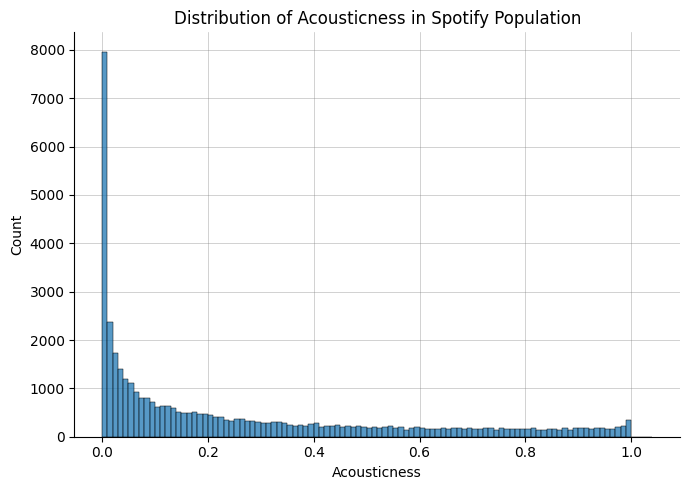

In [ ]:
# Plot a histogram of the acousticness from spotify_population with wider bins using pandas .hist().
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="acousticness",
    data=spotify_population,
    bins=np.arange(0, 1.05, 0.01),
)
sns.despine()

ax.set(
    xlabel="Acousticness",
    ylabel="Count",
    title="Distribution of Acousticness in Spotify Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### Are findings from the sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an `acousticness` column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

In [ ]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/sampling/data/spotify_mysterious_sample.csv"
spotify_mysterious_sample = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)

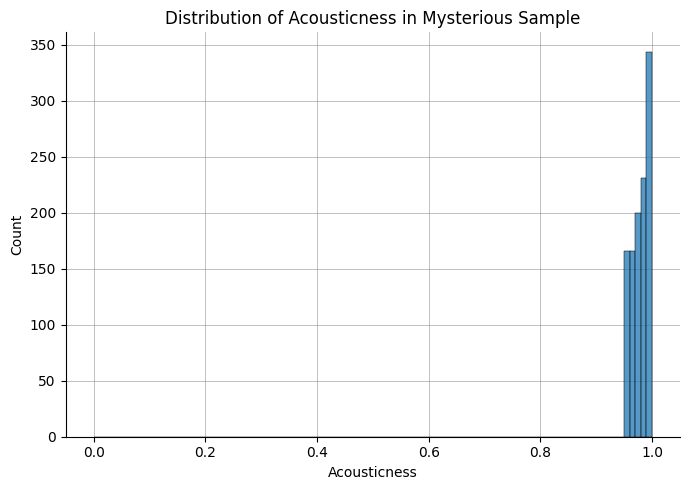

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="acousticness", data=spotify_mysterious_sample, bins=np.arange(0, 1.01, 0.01)
)
sns.despine()
ax.set(
    xlabel="Acousticness",
    ylabel="Count",
    title="Distribution of Acousticness in Mysterious Sample",
)

ax.grid(True, alpha=0.5, color="grey", linewidth=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the `duration_minutes` column of the Spotify dataset, which contains the length of the song in minutes.

In [ ]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/sampling/data/spotify_mysterious_sample2.csv"
spotify_mysterious_sample2 = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)

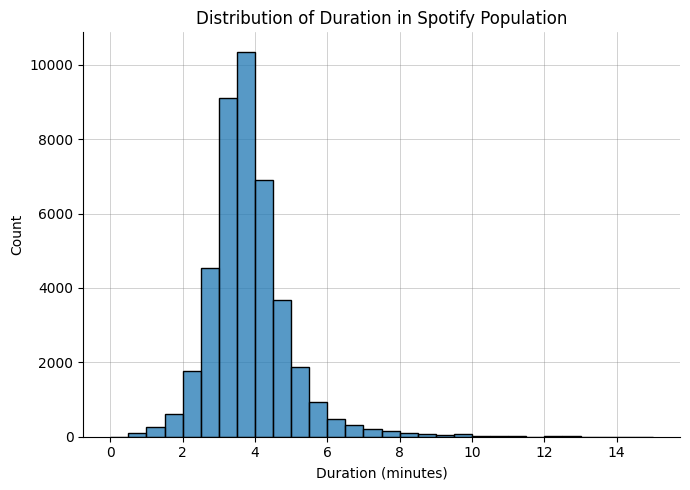

In [ ]:
# Plot a histogram of duration_minutes from spotify_population with bins of width 0.5 from 0 to 15
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="duration_minutes", data=spotify_population, bins=np.arange(0, 15.5, 0.5)
)
sns.despine()

ax.set(
    xlabel="Duration (minutes)",
    ylabel="Count",
    title="Distribution of Duration in Spotify Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

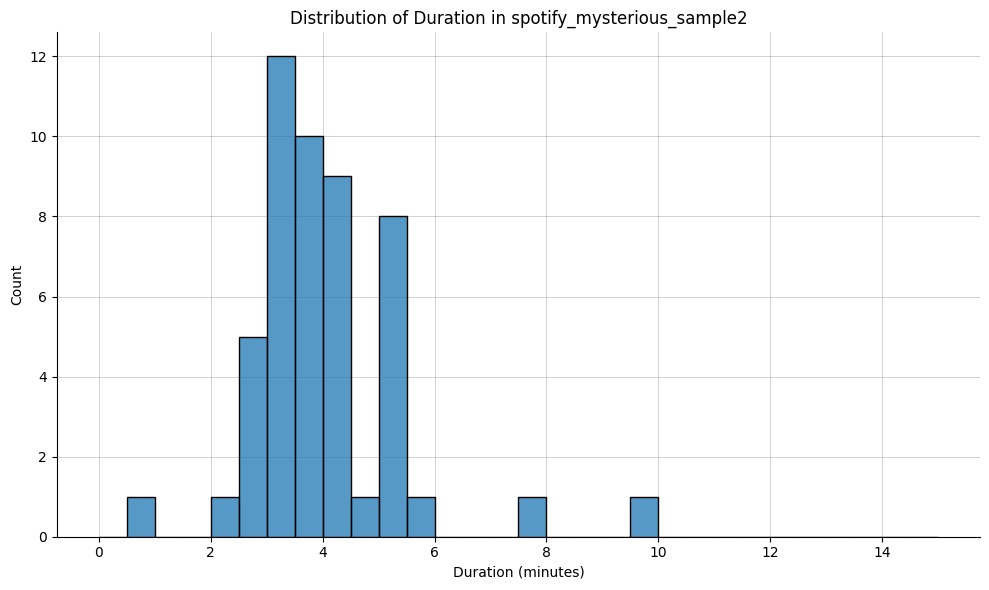

In [ ]:
# Update the histogram code to use the spotify_mysterious_sample2 dataset.
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    x="duration_minutes", data=spotify_mysterious_sample2, bins=np.arange(0, 15.5, 0.5)
)
sns.despine()

ax.set(
    xlabel="Duration (minutes)",
    ylabel="Count",
    title="Distribution of Duration in spotify_mysterious_sample2",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## True Randomness vs. Pseudo-Randomness

In the strictest sense, a random event is one that happens without any method or conscious decision. **True random numbers** are generated from unpredictable physical phenomena, such as atmospheric noise or radioactive decay. While these numbers are genuinely random, the processes to generate them are often slow and computationally expensive, making them impractical for most data science and simulation tasks.

Computers, being deterministic machines, use an alternative called **pseudo-random number generation**. This is a fast and cheap algorithmic process:

1.  It starts with an initial number called the **seed**.
2.  An algorithm takes the current number and performs a mathematical operation to calculate the next "random" number in the sequence.
3.  This new number then becomes the input for the next calculation, and so on.

Because this process is entirely algorithmic, the sequence of numbers is not truly random. However, the algorithms are designed such that the resulting sequence passes many statistical tests for randomness and is practically indistinguishable from a true random sequence for most purposes.

### The Importance of the Seed for Reproducibility

The most critical property of pseudo-random number generation is that **the same seed value will always produce the exact same sequence of numbers**.

This is not a flaw; it is a fundamental and essential feature for scientific and analytical work. It ensures **reproducibility**. If your analysis involves a random process (like creating a random sample of data or initializing the weights in a neural network), you must be able to replicate your results perfectly. By setting a seed before you generate random numbers, you guarantee that you, or a colleague, can re-run the code and get the exact same "random" numbers, and therefore the exact same final result.

This is implemented in Python's `numpy` library using the `np.random.seed()` function.

```python
import numpy as np

# 1. Set a seed and generate two random numbers 
np.random.seed(42)
first_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"First sequence (seed=42): {first_sequence}")

# 2. Generate two more numbers without resetting the seed 
# The sequence continues from where it left off.
second_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"Second sequence (no reset): {second_sequence}")

# 3. RESET the seed to the original value 
np.random.seed(42)
third_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"Third sequence (seed reset to 42): {third_sequence}")

# 4. Use a different seed 
np.random.seed(101)
fourth_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"Fourth sequence (seed=101): {fourth_sequence}")
```

As shown, the first and third sequences are identical because the seed was reset to the same value (`42`). This demonstrates how to ensure your random processes are reproducible.

### Generating Random Numbers in NumPy

The `numpy.random` module is the standard tool in Python for generating arrays of pseudo-random numbers from a wide variety of statistical distributions.

Some of the most common functions include:

| Function | Distribution |
| :--- | :--- |
| `.uniform(low, high, size)` | Uniform (all values in range have equal probability) |
| `.normal(loc, scale, size)` | Normal (Gaussian) |
| `.randint(low, high, size)` | Uniform integers |
| `.binomial(n, p, size)` | Binomial |
| `.poisson(lam, size)` | Poisson |
| `.beta(a, b, size)` | Beta |

You can visualize the distribution of the numbers you generate using a histogram.

```python
import matplotlib.pyplot as plt

np.random.seed(123)

# Generate 5000 random numbers from a Beta distribution
randoms_from_beta = np.random.beta(a=2, b=5, size=5000)

# Plot a histogram to visualize their distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=pd.DataFrame({'beta_values': randoms_from_beta}), 
             x='beta_values', 
             bins=np.arange(0, 1.01, 0.05), 
             edgecolor='black', 
             ax=ax)
ax.set_title("Histogram of 5000 Pseudo-Random Numbers from a Beta Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.grid(True, linestyle='--')
plt.show()
```

This process of setting a seed, generating numbers from a chosen distribution, and analyzing their properties is a foundational skill in simulation, statistics, and machine learning.

In [ ]:
# Generate 5000 numbers from a uniform distribution, setting the parameters low to -3 and high to 3.
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate 5000 numbers from a normal distribution, setting the parameters loc to 5 and scale to 2.
normals = np.random.normal(loc=5, scale=2, size=5000)

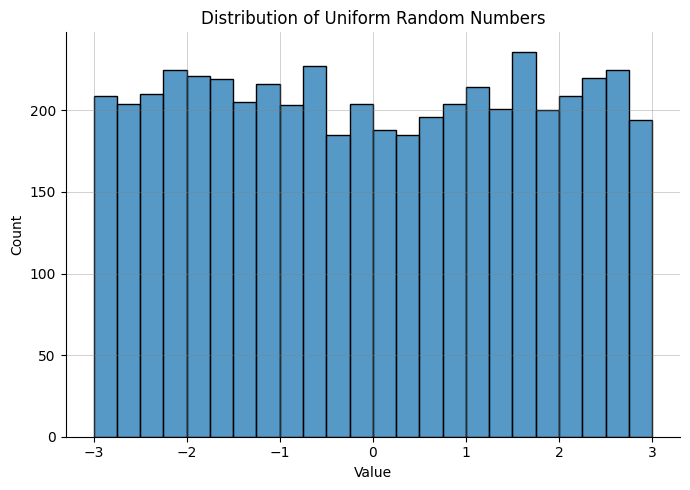

In [ ]:
# Plot a histogram of uniforms with bins of width of 0.25 from -3 to 3
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    uniforms,
    bins=np.arange(-3, 3.25, 0.25),
)
sns.despine()

ax.set(
    xlabel="Value",
    ylabel="Count",
    title="Distribution of Uniform Random Numbers",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")

plt.tight_layout()
plt.show()

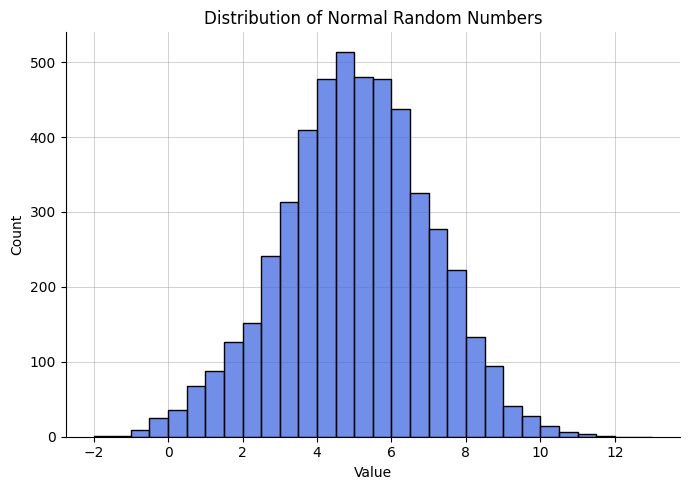

In [23]:
# Plot a histogram of normals with bins of width of 0.5 from -2 to 13
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(normals, bins=np.arange(-2, 13.5, 0.5), color="royalblue")
sns.despine()

ax.set(
    xlabel="Value",
    ylabel="Count",
    title="Distribution of Normal Random Numbers",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## Simple Random Sampling

**Simple random sampling** is a probability sampling method where each individual observation in the population has an equal chance of being selected. Furthermore, every possible sample of a given size `n` has an equal chance of being chosen. This method is the gold standard for avoiding selection bias, as it relies on pure chance.

In pandas, simple random sampling is performed efficiently using the `.sample()` method.

  * **`n`**: The number of samples to return.
  * **`frac`**: The proportion of samples to return (e.g., `0.1` for 10%).
  * **`random_state`**: A seed for the pseudo-random number generator to ensure reproducibility.

```python
import pandas as pd
import numpy as np

# Create a generic "population" DataFrame
population = pd.DataFrame({'value': np.arange(0, 100)})

# Take a simple random sample of 5 rows
random_sample = population.sample(n=5, random_state=42)

print(random_sample)
```

### Systematic Sampling

**Systematic sampling** is another probability sampling method that involves selecting observations from an ordered list at a regular interval.

**The Process:**

1.  Calculate a sampling interval, `k`, by dividing the population size by the desired sample size.
2.  Select every `k`-th element from the population.

This can be implemented in pandas using integer-location based indexing (`.iloc`) with a slice.

```python
# Define sample size and population size
sample_size = 5
population_size = len(population)

# 1. Calculate the interval
interval = population_size // sample_size

# 2. Select every k-th row
systematic_sample = population.iloc[::interval]

print(systematic_sample)
```
### The Hidden Danger of Systematic Sampling

Systematic sampling is only valid if the order of the data in the DataFrame is **random** with respect to the variable(s) of interest. If the data is sorted or contains a cyclical pattern, systematic sampling can produce a highly biased and unrepresentative sample.

For example, if a dataset of customer ratings is sorted from highest to lowest, a systematic sample will consist of a few high ratings, a few medium ratings, and a few low ratings, but it will not be a truly random mix.

#### Visual Diagnosis

You can check for patterns in your data's order by plotting a variable against the DataFrame's index. A clear trend in this plot signals that systematic sampling would be dangerous.

```python
import seaborn as sns

# Create a "dangerous" population that is sorted by value
sorted_population = pd.DataFrame({'value': np.sort(np.random.normal(100, 20, 1000))})
# Add an index column for plotting
sorted_population_with_id = sorted_population.reset_index()

# Plot value vs. index using seaborn OOP
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(
    data=sorted_population_with_id,
    x="index",
    y="value",
    ax=ax,
    color="tab:red",
    edgecolor="w",
    s=40
)
ax.set_title("Data is NOT Randomly Ordered")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.grid(True, linestyle="--", alpha=0.6)
sns.despine(ax=ax)
plt.tight_layout()
plt.show()

# Perform systematic sampling on this sorted data
biased_systematic_sample = sorted_population.iloc[::200] # interval = 1000 // 5
print(biased_systematic_sample)
print(f"\nBiased Sample Mean: {biased_systematic_sample['value'].mean():.2f}")
print(f"True Population Mean: {sorted_population['value'].mean():.2f}")
```

### The Solution: Shuffling

To safely use systematic sampling (or to ensure randomness in general), you must first break any existing order in the data by **shuffling** it. A simple and effective way to shuffle a DataFrame is to take a random sample of 100% of its rows (`frac=1`).

A key statistical insight is that **a systematic sample drawn from a randomly shuffled population is equivalent to a simple random sample.**

```python
# Shuffle the dangerous, sorted population
shuffled_population = sorted_population.sample(frac=1, random_state=42).reset_index(drop=True)

# The plot now shows no trend
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(
    data=shuffled_population.reset_index(),
    x="index",
    y="value",
    ax=ax,
    color="tab:blue",
    edgecolor="w",
    s=40
)
ax.set_title("Data is NOW Randomly Ordered")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.grid(True, linestyle="--", alpha=0.6)
sns.despine(ax=ax)
plt.tight_layout()
plt.show()

# Perform systematic sampling on the SHUFFLED data
safe_systematic_sample = shuffled_population.iloc[::200]
print(safe_systematic_sample)
print(f"\nSafe Sample Mean: {safe_systematic_sample['value'].mean():.2f}")
print(f"True Population Mean: {sorted_population['value'].mean():.2f}")
```

After shuffling, the systematic sampling procedure produces a much more representative sample whose mean is a better estimate of the true population mean.